# Percu 1

In [50]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anime
import scipy

plt.rcParams['text.usetex'] = True

import IPython
import soundfile as sf


In [51]:
def play(*args, **kwargs):
    IPython.display.display(IPython.display.Audio(*args, **kwargs))

## Poutre d'Euler Bernoulli

modèle simple et classique

### Hypotheses

- Solide élancé, $L \gg h, b$
- La forme de la section ne change pas au cours du temps -> pas de deformation
- Pas de cisaillement ($\Phi''' = 0$?) (cisaillement considéré par Timoshenko)
- Petites perturbations d'un état d'équilibre
- Materiau isotrope
- Que de la flexion
- Section constante

### ED

$$
EI \frac{\partial^4 y}{\partial x^4} + \rho S \frac{\partial^2 y}{\partial t^2} = 0
$$

En posant:

$$\displaystyle c^2 = \frac{EI}{\rho S}$$

$$
\boxed{
    \frac{\partial^4 y}{\partial x^4} + \frac{1}{c^2} \frac{\partial^2 y}{\partial t^2} = 0
}
$$


### Relation de dispersion et solutions génerales

On cherche des solutions stationnaires de la forme

$$
y(x, t) = \phi(x) e^{j \omega t}
$$

Alors,

$$
\phi'''' e^{j \omega t} -  \frac{\omega^2}{c^2} \phi e^{j \omega t} = 0
$$

Donc, en posant:

$$
\displaystyle k^4 =  \frac{\omega^2}{c^2}
$$

Avec la relation de dispersion $\omega = k^2c$

$$
\boxed{
    \phi''''(x) = k^4 \phi(x)
}
$$

L'équation caractéristique a 4 racines ${k, \, -k, \, jk, \, -jk}$, donc la solution générale est la combinaison linéaire:

$$
\phi(x) =
A e^{j k  x} +
B e^{-j k  x} +
C e^{k  x} +
D e^{-k  x}
$$

ou encore

$$
\boxed{
    \phi(x) =
    a \cos k x +
    b \sin k x +
    c \cosh k x +
    d \sinh k x
}
$$

## Conditions aux limites Libre-Libre

### Extremite libre

- $y\,$: pas de contrainte sur le déplacement
- $y'\,$: pas de contrainte sur la pente

mais pas de forces (et de moments) sur une extremité libre donc:

- $y''\,$: pas de moment flechissant -> $y'' = 0$
- $y'''\,$: pas de force de cisaillement -> $y''' = 0$

Donc:

$$
\begin{equation*}
    \begin{cases}
        \phi''(x_0) & = & 0 \\
        \phi'''(x_0) & = & 0 
    \end{cases}       
\end{equation*}
$$


### en 0

$$
\begin{equation*}
\begin{cases}
    \phi''(0) = 0
    \, & \Leftrightarrow & \,
    a = c \\

    \phi'''(0) = 0
    \, & \Leftrightarrow & \,
    b = d
\end{cases}
\end{equation*}
$$


$$
$$

Alors,

$$
\boxed{
\phi(x) =
a (\cos k x +
 \cosh k x) +
b (\sin k x +
 \sinh k x)
}
$$

Note: les modes sont connus à une constante multiplicative près. Si on peut évaluer $a$, $b$, ou $a/b$ on aura tout gagné


### en L

On a:

$$
\begin{equation*}
    \begin{cases}
        \frac{\phi''(x)}{k^2} & = &
        a (\cosh kx  - \cos kx ) +
        b (\sinh kx  - \sin kx ) \\

        \frac{\phi'''(x)}{k^3} & = &
        a (\sin kx  + \sinh kx ) +
        b (\cosh kx  - \cos kx ) \\
    \end{cases}       
\end{equation*}
$$

Donc:

$$
\begin{equation*}
    \begin{cases}
        0 & = &
        a (\cosh kL  - \cos kL ) +
        b (\sinh kL  - \sin kL ) \\

        0 & = &
        a (\sin kL  + \sinh kL ) +
        b (\cosh kL  - \cos kL ) \\
    \end{cases}       
\end{equation*}
$$

C'est-à-dire:

$$
\begin{equation*}
    \begin{cases}
        a (\cos kL  - \cosh kL )  & = &
        b (\sinh kL  - \sin kL ) \\

        a (\sin kL  + \sinh kL ) & = &
        b (\cos kL  - \cosh kL ) \\
    \end{cases}       
\end{equation*}
$$

N'importe laquelle de ces équations nous donne le ratio $a/b$, prenons:


$$
\boxed{
\frac{a}{b} = - \frac{\sinh k L  - \sin k L }{\cosh k L  - \cos k L }
}
$$

Et on peut diviser l'une par l'autre pour nous donner une équation purement sur $kL$, apres qq calculs (en utilisant $\cos^2 + \sin^2 = 1$ et $\cosh^2 - \sinh^2 = 1$), on trouve le condition de quantification:

$$
\boxed{
\cos k L \, \cosh k L = 1
}
$$

### Methode

On trouve les $k_n$ qui verifient cette equation numériquement/graphiquement

A chacun de ces $k_n$, on associe le mode:

$$
\phi_n(x) = 
a_n (\cos k_n x +
 \cosh k_n x) +
b_n (\sin k_n x +
 \sinh k_n x)
$$

Les $a_n$ et $b_n$ vérifiant l'équation:

$$
\frac{a_n}{b_n} = - \frac{\sinh(k_n L) - \sin(k_n L)}{\cosh(k_n L) - \cos(k_n L)}
$$

On a alors entièrement déterminé le mode, à une constante de normalisation près.

A chaque mode correspond la pulsation $\omega_n = c  k_n^2$


## Application numerique

[SOPRANO GLOCKENSPIEL BAR A (1ST OCTAVE)](https://musicandschools.com/en/orff/887-soprano-glockenspiel-bar-a-1st-octave-8435040736336.html)

> Soprano glockenspiel bar A (1st octave). Bar made of steel tuned to A=440Hz. Grey finish. Musical notation in the middle of the bar. Approximate dimensions: 20 x 3 x 95 mm. 

$$L = 95 \, \textrm{mm}$$
$$b = 20 \, \textrm{mm}$$
$$h = 3 \, \textrm{mm}$$
$$E(\textrm{acier}) = 200 \, \textrm{GPa}$$
$$\rho(\textrm{acier}) = 7800 \, \textrm{kg}/\textrm{m}^3$$

![determination graphique des kL](./figures/desmos.png)

In [52]:
# tout en SI
class Beam:
    L = 94.1928005 / 1000  # ajuste a la main pour produire un La
    b = 20.0 / 1000
    h = 3.0 / 1000
    E = 200_000_000_000
    rho = 7800
    S = b * h
    I = b * h * h * h / 12  # moment quadratique
    c = math.sqrt(E * I / (rho * S))


# solutions de cos(kL)cosh(kL) = 1
# releves graphiquement sur desmos
kLs = [
    4.73004,
    7.8532,
    10.99561,
    14.137164,
    17.27876,
    20.52035,
]


class Mode:
    # a (cos(kx) + cosh(kx)) + b (sin(kx) + sinh(kx))
    def __init__(self, kL):
        # on pose arbitrairement b = 1, on peut renormaliser plus tard
        self.a = -(math.sinh(kL) - math.sin(kL)) / (math.cosh(kL) - math.cos(kL))
        self.b = 1
        self.k = kL / Beam.L

    def pulsation(self):
        return Beam.c * self.k * self.k

    def frequence(self):
        return self.pulsation() / (2 * np.pi)

    def at(self, x):
        kx = self.k * x
        cosPart = np.cos(kx) + np.cosh(kx)
        sinPart = np.sin(kx) + np.sinh(kx)
        return self.a * cosPart + self.b * sinPart

    def realise(self, nPoints):
        x = np.linspace(0, Beam.L, nPoints)
        return self.at(x)

    def normalise(self, scale):
        self.a *= scale
        self.b *= scale

    def log(self):
        print(f"{self.k=}")
        print(f"{self.a=}")
        print(f"{self.b=}")


modes = [Mode(kL) for kL in kLs]

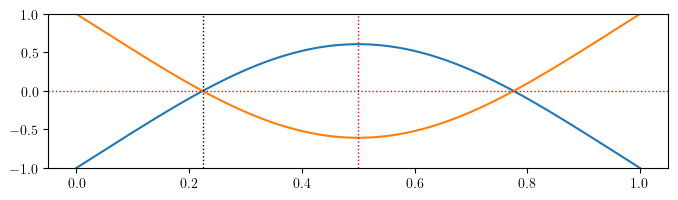

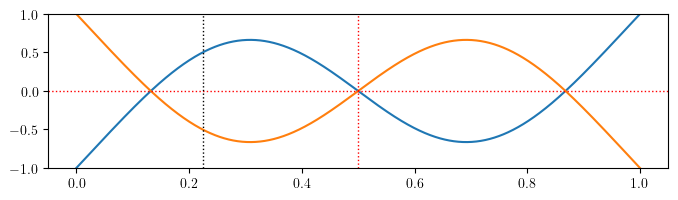

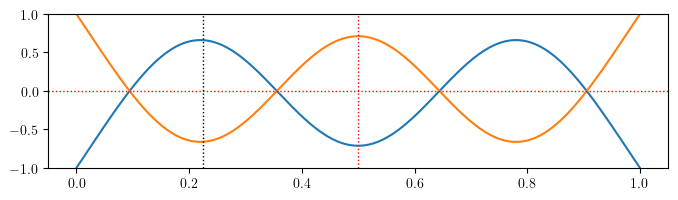

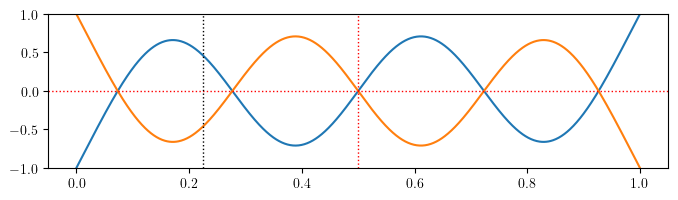

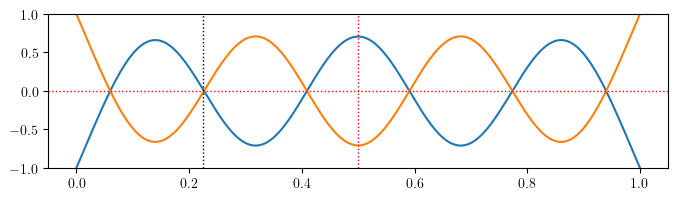

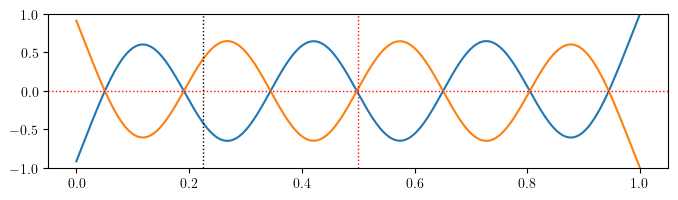

In [53]:
# observons les modes

N = 1000
X = np.linspace(0, 1, N)

for mode in modes:
    phi = mode.realise(N)
    maximum = np.max(np.abs(phi))
    phi /= maximum

    plt.figure(figsize=(8, 2))
    plt.plot(X, phi)
    plt.plot(X, -phi)

    plt.ylim((-1, 1))
    plt.axvline(x=0.5, color="red", linestyle="dotted", linewidth=1)
    plt.axhline(y=0, color="red", linestyle="dotted", linewidth=1)
    plt.axvline(x=0.224, color="black", linestyle="dotted", linewidth=1)
    plt.show()

In [54]:
# Synthese

sampleRate = 44_100
duration = 5  # secs
N = int(duration * sampleRate)

buffer = np.zeros(N)
t = np.linspace(0, duration, N)

# additioner des sinusoides non amorties
for mode in modes:
    f = mode.frequence()
    y = np.cos(2 * np.pi * f * t)
    buffer += y

# appliquer une envelope exp. sur tout le monde
decay = 0.5  # secs
envelope = np.exp(-t / decay)
buffer = np.multiply(buffer, envelope)


def dB(db):
    return 10 ** (db / 20)


# normaliser
amplitude = max(np.abs(buffer))
buffer = buffer / amplitude

# baisser un peu le volume
volume = -12
buffer = buffer * dB(volume)

maxAmplitude = max(np.abs(buffer))
dB_fullScale = 20 * np.log10(maxAmplitude)
print(f"Warning: the following sound has a volume of {dB_fullScale} dB FS")
print("If it reads a positive value, it WILL clip and destroy your ears")
print("play at your own risk")

play(buffer, rate=sampleRate)
sf.write("ding.wav", buffer, sampleRate)

If it reads a positive value, it WILL clip and destroy your ears
play at your own risk


### Base modale et orthogonalité

#### Énergie cinétique et masse modale

Prenons la décomposition modale:

$$
\boxed{
y(x, t) = \sum_{n \in \mathbb{N}} q_n(t) \phi_n(x)
}
$$

Où $\phi_n(x)$ est la $n$-ième déformée modale et $q_n(t)$ la $n$-ième coordonée modale.

On a l'énergie cinétique totale:

$$
\begin{align*}
\mathcal{T}(t) 
& = \frac{1}{2} \int_0^L \rho S \dot{y}^2 \textrm{d}x \\
\mathcal{T}(t) 
& = \frac{1}{2} \int_0^L \rho S (\sum_{n} \dot{q_n}\phi_n) (\sum_{p} \dot{q_p}\phi_p)\textrm{d}x \\
\mathcal{T}(t) 
& = \frac{1}{2} \sum_n \sum_p \dot{q_n}\dot{q_p} \int_0^L \rho S \phi_n \phi_p \textrm{d}x \\
\end{align*}
$$

Or les solutions à ce probleme sont orthogonales vis-à-vis de la masse, i.e.
$$
\int_0^L \rho S \phi_n \phi_p \textrm{d}x = 0 \quad \textrm{si} \, n \ne p
$$

Alors en posant la masse modale

$$
\boxed{
\displaystyle M_n = \int_0^L \rho S \phi_n(x)^2 \textrm{d}x
}
$$

$$
\begin{align*}
\mathcal{T}(t) 
& = \frac{1}{2} \sum_n \sum_p \dot{q}_n\dot{q}_p \int_0^L \rho S \phi_n \phi_p \textrm{d}x \\
\mathcal{T}(t) 
& =  \frac{1}{2} \sum_n \dot{q}_n(t)^2 \int_0^L \rho S \phi_n(x)^2 \textrm{d}x
\end{align*}
$$
$$
\boxed{
\mathcal{T}(t) 
 =  \frac{1}{2} \sum_n M_n \dot{q}_n(t)^2 \\
}
$$

Où on voit apparaitre l'énergie cinétique du mode $n$

$$
\boxed{
\mathcal{T}_n(t) =  \frac{1}{2} M_n \dot{q}_n(t)^2
}
$$

Similairement, on peut identifier la raideur modale $K_n$:

$$
\boxed{
K_n = \int_0^L EI \phi_n''(x)^2 \textrm{d}x
}
$$

et l'énergie potentielle de chaque mode:

$$
\boxed{
\mathcal{U}_n =  \frac{1}{2} K_n q_n(t)^2
}
$$

#### Normalisation par rapport à la masse

On va normaliser par rapport à la masse, c'est à dire qu'on pose le produit scalaire suivant:

$$
\langle f, \, g \rangle = \int_0^L \rho S f(x)g(x)dx
$$

et normaliser de manière à ce que:
$$\langle \phi_n , \, \phi_p \rangle = \delta_{np}$$

c'est à dire poser la masse modale de chaque mode à 1.

Alors, on pourra utiliser ce produit scalaire pour projeter une excitation arbitraire sur la base modale.

In [55]:
def integrateProduct(y1, y2, dx):
    assert len(y1) == len(y2)
    y = np.multiply(y1, y2)
    return dx * sum(y)


def massInnerProduct(f, g):
    assert len(f) == len(g)
    N = len(f)
    return Beam.rho * Beam.S * integrateProduct(f, g, Beam.L / N)


N = 10000

for mode in modes:
    phi = mode.realise(N)
    modalMass = massInnerProduct(phi, phi)
    mode.normalise(1 / math.sqrt(modalMass))

## Conditions initiales, coordonnees modales

Prenons la décomposition modale:

$$
y(x, t) = \sum_{n \in \mathbb{N}} q_n(t) \phi_n(x)
$$


On choisit de considérer une impulsion ponctuelle sans déplacement initial en $x = x_0$. On a:

$$
\begin{equation*}
\begin{cases}
y(x, 0) = & 0 \\
\dot{y}(x, 0) = & v_0 \, \delta(x - x_0)
\end{cases}
\end{equation*}
$$

i.e.

$$
\begin{equation*}
\begin{cases}
\sum_n q_n(0) \phi_n(x) = & 0 \\
\sum_n \dot{q}_n(0) \phi_n(x) = & v_0 \, \delta(x - x_0)
\end{cases}
\end{equation*}
$$

et donc, en décomposant sur la base modale:

$$
\boxed{
\begin{equation*}
\begin{cases}
q_n(0) = & 0 \\
\dot{q}_n(0) = & v_0 \, \langle \delta_{x_0}, \, \phi_n \rangle
\end{cases}
\end{equation*}
}
$$

On cherche des coordonées modales de la forme:

$$
q_n(t) = \alpha_n \sin \omega_n t + \beta_n \cos \omega_n t
$$

Donc

$$
q_n(0) = 0 \Rightarrow \beta_n = 0
$$

Les coordonnées modales sont donc de la forme 

$$
\boxed{
q_n(t) = \alpha_n \sin \omega_n t
}
$$

Et, pour la vitesse initiale:

$$
\begin{align*}
\dot{q}_n(0)
& = v_0 \, \langle \delta_{x_0}, \, \phi_n \rangle \\
& = v_0 \rho S \int_0^L \phi_n(x) \delta(x - x_0) \textrm{d}x 
\end{align*}
$$

$$
\boxed{
\dot{q}_n(0) = \alpha_n \omega_n = v_0 \rho S \phi_n(x_0)
}
$$

Note: si $\phi_n(x_0) = 0$, c'est-à-dire si la déformée modale présente un noeud en $x_0$, alors le mode n'est pas excité.

On a donc entièrement caractérisé les coordonnées modales:

$$
\boxed{
\alpha_n = \frac{v_0 \rho S \phi_n(x_0)}{\omega_n}
}
$$

$$
\boxed{
q_n(t) = \frac{v_0 \rho S \phi_n(x_0)}{\omega_n} \sin \omega_n t
}
$$

et finalement:

$$
\boxed{
y(x, t) = \sum_n \frac{v_0 \rho S \phi_n(x_0)}{\omega_n} \sin \omega_n t \, \phi_n(x)
}
$$


### Animation

In [60]:
x0 = 0.5 * Beam.L

nPoints = 300

phi = [mode.realise(nPoints) for mode in modes]
pulsations = [mode.pulsation() for mode in modes]

# coefficients modaux v0 rho S phi_n(x0) / w_n
# on elimine les termes v0 rho S constant
# donc alpha_n = phi_n(x0) / w0
alpha_n = [mode.at(x0) / mode.pulsation() for mode in modes]
phi = [alpha * _phi for (alpha, _phi) in zip(alpha_n, phi)]

duree = 5
fps = 30

xValues = np.linspace(0, 1, nPoints)
nFrames = int(duree * fps)
tValues = np.linspace(0, duree, nFrames)

Y = np.zeros((nFrames, nPoints))  # liste de graphes

for frame, t in enumerate(tValues):
    for i in range(len(modes)):
        spaceEnveloppe = phi[i]
        timeEnveloppe = np.sin(pulsations[i] * t)
        Y[frame] += np.multiply(timeEnveloppe, spaceEnveloppe)

fig, ax = plt.subplots()
(line,) = ax.plot(xValues, Y[0])
ax.set_xlim(0, 1)
yMax = 0.05
ax.set_ylim(-yMax, yMax)

def update(frame):
    line.set_ydata(Y[frame])
    return (line,)

ani = anime.FuncAnimation(
    fig, update, frames=nFrames, interval=1000/fps, blit=True
)
ani.save("./undampened.mp4")
IPython.display.HTML(ani.to_jshtml())


### Énergétique

On peut calculer l'énergie transmise à chaque mode:

$q_n(0) = 0$ donc $\mathcal{U}_n(0) = 0$

Donc $E_n(0) = \mathcal{T}_n(0) = \frac{1}{2} \dot{q_n}(0)^2$ (masses modales unitaires).

$$
\boxed{
E_n(0) = \frac{1}{2} \, (v_0 \rho S \phi_n(x_0))^2
}
$$

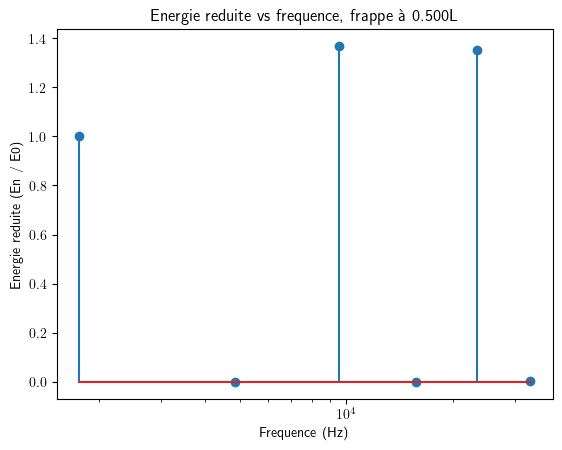

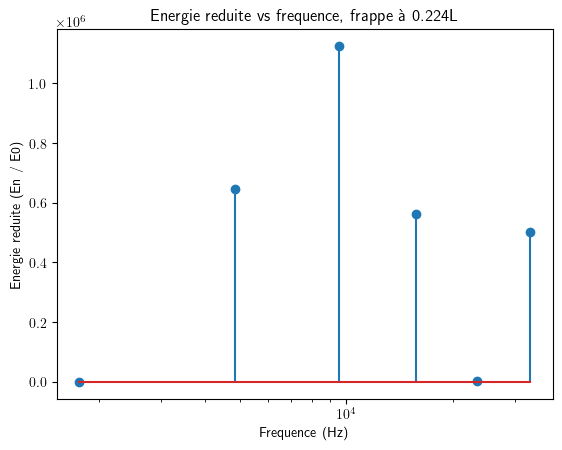

In [57]:
# On est pas tant interesse par la valeur absolue de En, seulement les ratios
# On se permet donc d'écrire En(0) = phi_n(x0)^2 puis normaliser par E0


def plotEnergie(x0):
    energies = [mode.at(x0) * mode.at(x0) for mode in modes]
    energies = [float(energy / energies[0]) for energy in energies]
    frequences = [mode.frequence() for mode in modes]

    plt.stem(frequences, energies)
    plt.title("Energie reduite vs frequence, frappe à {0:.3f}L".format(x0 / Beam.L))
    plt.xlabel("Frequence (Hz)")
    plt.ylabel("Energie reduite (En / E0)")
    plt.xscale("log")
    plt.show()


plotEnergie(0.5 * Beam.L)
plotEnergie(0.224 * Beam.L)

Comme prévu, taper en 0.5 excite les modes symétriques et inhibe les modes antisymétriques.

Taper en 0.224 inhibe le fondamental.


## Annexe

### Intuition des dérivées succéssives du mouvement transverse

##### 1) $\displaystyle \frac{\partial y}{\partial x}$

Si $\theta$ est l'angle formé par la poutre, 
$\displaystyle \theta(x, t) \sim \tan(\theta(x, t)) = \frac{\partial y}{\partial x}(x, t)$

$\displaystyle \frac{\partial y}{\partial x}$ représente la pente/rotation de la poutre

##### 2) $\displaystyle \frac{\partial^2 y}{\partial x^2}$

Lié au rayon de courbure
$$
\frac{1}{\mathcal{R}} = 
\frac{\partial^2 y}{\partial x^2}
$$ 

Lié au moment fléchissant, i.e. la "force" de rappel en rotation
$$
\mathcal{M} = EI \frac{\partial \theta}{\partial x}
$$
$$
\mathcal{M} = EI 
\frac{\partial^2 y}{\partial x^2}
$$

##### 3) $\displaystyle \frac{\partial^3 y}{\partial x^3}$

La où la courbure change
=> lié à la force de cisaillement
$$
\mathcal{T} = \frac{\partial}{\partial x}(EI
\frac{\partial^2 y}{\partial x^2}
)
$$

Et si $EI$ constant:
$$
\mathcal{T} = EI 
\frac{\partial^3 y}{\partial x^3}
$$